In [7]:
!pip install dask[dataframe] holidays imbalanced-learn missingno

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1


In [1]:
""" Load dataset 2 (historical product demand) """
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
from sklearn.preprocessing import OneHotEncoder

def __iter__(self): return 0

# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='eQxyAJ2Eh90u8BtbRbPEOSWebWXzIATuhqDBzj8YkQ4O',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'mm-donotdelete-pr-vswfii3kvbe6na'
object_key = 'Historical Product Demand Y.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df2 = pd.read_csv(body)

# DATA CLEANING
# convert to datetime
df2['Date'] = pd.to_datetime(df2['Date'])
df2.head(10)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
5,Product_0979,Whse_J,Category_028,2012-04-19,500
6,Product_0979,Whse_J,Category_028,2012-06-05,500
7,Product_0979,Whse_J,Category_028,2012-06-27,500
8,Product_0979,Whse_J,Category_028,2012-07-23,500
9,Product_0979,Whse_J,Category_028,2012-08-29,500


In [2]:
""" load dataset 3 (all transport routes)"""
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# The following code accesses a file in your IBM Cloud Object Storage. It includes credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='eQxyAJ2Eh90u8BtbRbPEOSWebWXzIATuhqDBzj8YkQ4O',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'mm-donotdelete-pr-vswfii3kvbe6na'
object_key = 'All Routes Table Y.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): 
    body.__iter__ = types.MethodType( __iter__, body )

df3 = pd.read_csv(body)

df3['Product_Code'] = df3['Product_Code'].astype('category')

#df3.shape
df3.head(10)

,Warehouse,Product_Code,SupplierID,ManufID,WH1,WH2,WH3,WH4,Time_Enroute,Destination,...,f3,f4,f5,capacity,prodx,cost,Product_Code_Warehouse,Forecast,xProd_vecm,production_quantity
0,W2,Product_0001,S1,M1,W1,W3,W4,W2,5,W2,...,1941.680672,1574.236047,965.635097,58.0,Product_0001S1M1W1W3W4W2,0.02,Product_0001_W2,138,Product_0001S1M1W1W3W4W2,0.0
1,W2,Product_0001,S1,M1,W1,W4,W3,W2,5,W2,...,1238.977201,987.316035,378.715085,58.0,Product_0001S1M1W1W4W3W2,0.02,Product_0001_W2,138,Product_0001S1M1W1W4W3W2,0.0
2,W2,Product_0001,S1,M1,W3,W1,W4,W2,5,W2,...,1584.740888,1217.296263,965.635097,58.0,Product_0001S1M1W3W1W4W2,0.02,Product_0001_W2,138,Product_0001S1M1W3W1W4W2,0.0
3,W2,Product_0001,S1,M1,W3,W4,W1,W2,5,W2,...,1599.191579,990.590629,738.929463,58.0,Product_0001S1M1W3W4W1W2,0.02,Product_0001_W2,138,Product_0001S1M1W3W4W1W2,0.0
4,W2,Product_0001,S1,M1,W4,W1,W3,W2,5,W2,...,997.820877,746.159710,378.715085,58.0,Product_0001S1M1W4W1W3W2,0.02,Product_0001_W2,138,Product_0001S1M1W4W1W3W2,0.0
5,W2,Product_0001,S1,M1,W4,W3,W1,W2,5,W2,...,1714.975037,1106.374088,738.929463,58.0,Product_0001S1M1W4W3W1W2,0.02,Product_0001_W2,138,Product_0001S1M1W4W3W1W2,0.0
6,W2,Product_0001,S1,M2,W1,W3,W4,W2,5,W2,...,1941.680672,1574.236047,965.635097,58.0,Product_0001S1M2W1W3W4W2,0.02,Product_0001_W2,138,Product_0001S1M2W1W3W4W2,0.0
7,W2,Product_0001,S1,M2,W1,W4,W3,W2,5,W2,...,1238.977201,987.316035,378.715085,58.0,Product_0001S1M2W1W4W3W2,0.02,Product_0001_W2,138,Product_0001S1M2W1W4W3W2,0.0
8,W2,Product_0001,S1,M2,W3,W1,W4,W2,5,W2,...,1584.740888,1217.296263,965.635097,58.0,Product_0001S1M2W3W1W4W2,0.02,Product_0001_W2,138,Product_0001S1M2W3W1W4W2,0.0
9,W2,Product_0001,S1,M2,W3,W4,W1,W2,5,W2,...,1599.191579,990.590629,738.929463,58.0,Product_0001S1M2W3W4W1W2,0.02,Product_0001_W2,138,Product_0001S1M2W3W4W1W2,0.0


In [4]:
"""
Merging datasets 
"""
df3_sampled = df3.sample(frac=0.1, random_state=42)
df2_sampled = df2.sample(frac=0.1, random_state=42)

# Step 2: Replace warehouse codes in df2
df2_sampled['Warehouse'] = df2_sampled['Warehouse'].replace({'Whse_J': 'W1', 'Whse_A': 'W2', 'Whse_S': 'W4'})

# Step 3: Merge the two datasets on 'Product_Code' and 'Warehouse'
merged_df = pd.merge(df3_sampled, df2_sampled, on=['Product_Code', 'Warehouse'], how='inner')

# Display the merged dataframe
merged_df.head(10)

,Warehouse,Product_Code,SupplierID,ManufID,WH1,WH2,WH3,WH4,Time_Enroute,Destination,...,capacity,prodx,cost,Product_Code_Warehouse,Forecast,xProd_vecm,production_quantity,Product_Category,Date,Order_Demand
0,W1,Product_0981,S3,M2,W4,W3,W2,W1,5,W1,...,15151.0,Product_0981S3M2W4W3W2W1,0.02,Product_0981_W1,14517,Product_0981S3M2W4W3W2W1,0.0,Category_028,2016-10-03,250
1,W1,Product_0981,S3,M2,W4,W3,W2,W1,5,W1,...,15151.0,Product_0981S3M2W4W3W2W1,0.02,Product_0981_W1,14517,Product_0981S3M2W4W3W2W1,0.0,Category_028,2014-12-22,10000
2,W1,Product_0981,S3,M2,W4,W3,W2,W1,5,W1,...,15151.0,Product_0981S3M2W4W3W2W1,0.02,Product_0981_W1,14517,Product_0981S3M2W4W3W2W1,0.0,Category_028,2014-10-14,500
3,W1,Product_0981,S3,M2,W4,W3,W2,W1,5,W1,...,15151.0,Product_0981S3M2W4W3W2W1,0.02,Product_0981_W1,14517,Product_0981S3M2W4W3W2W1,0.0,Category_028,2016-09-23,750
4,W1,Product_0981,S3,M2,W4,W3,W2,W1,5,W1,...,15151.0,Product_0981S3M2W4W3W2W1,0.02,Product_0981_W1,14517,Product_0981S3M2W4W3W2W1,0.0,Category_028,2014-10-28,3000
5,W1,Product_0981,S3,M2,W4,W3,W2,W1,5,W1,...,15151.0,Product_0981S3M2W4W3W2W1,0.02,Product_0981_W1,14517,Product_0981S3M2W4W3W2W1,0.0,Category_028,2012-09-26,250
6,W1,Product_0981,S3,M2,W4,W3,W2,W1,5,W1,...,15151.0,Product_0981S3M2W4W3W2W1,0.02,Product_0981_W1,14517,Product_0981S3M2W4W3W2W1,0.0,Category_028,2014-12-11,250
7,W1,Product_0981,S3,M2,W4,W3,W2,W1,5,W1,...,15151.0,Product_0981S3M2W4W3W2W1,0.02,Product_0981_W1,14517,Product_0981S3M2W4W3W2W1,0.0,Category_028,2014-01-15,150
8,W1,Product_0981,S3,M2,W4,W3,W2,W1,5,W1,...,15151.0,Product_0981S3M2W4W3W2W1,0.02,Product_0981_W1,14517,Product_0981S3M2W4W3W2W1,0.0,Category_028,2012-06-04,100
9,W1,Product_0981,S3,M2,W4,W3,W2,W1,5,W1,...,15151.0,Product_0981S3M2W4W3W2W1,0.02,Product_0981_W1,14517,Product_0981S3M2W4W3W2W1,0.0,Category_028,2013-04-26,300


In [ ]:
"""EDA step on merged df"""

In [5]:
print(merged_df.info())
print(merged_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514528 entries, 0 to 514527
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Warehouse               514528 non-null  object        
 1   Product_Code            514528 non-null  object        
 2   SupplierID              514528 non-null  object        
 3   ManufID                 514528 non-null  object        
 4   WH1                     514528 non-null  object        
 5   WH2                     483077 non-null  object        
 6   WH3                     392777 non-null  object        
 7   WH4                     196331 non-null  object        
 8   Time_Enroute            514528 non-null  int64         
 9   Destination             514528 non-null  object        
 10  Miles                   514528 non-null  float64       
 11  f1                      514528 non-null  float64       
 12  f2                      514528

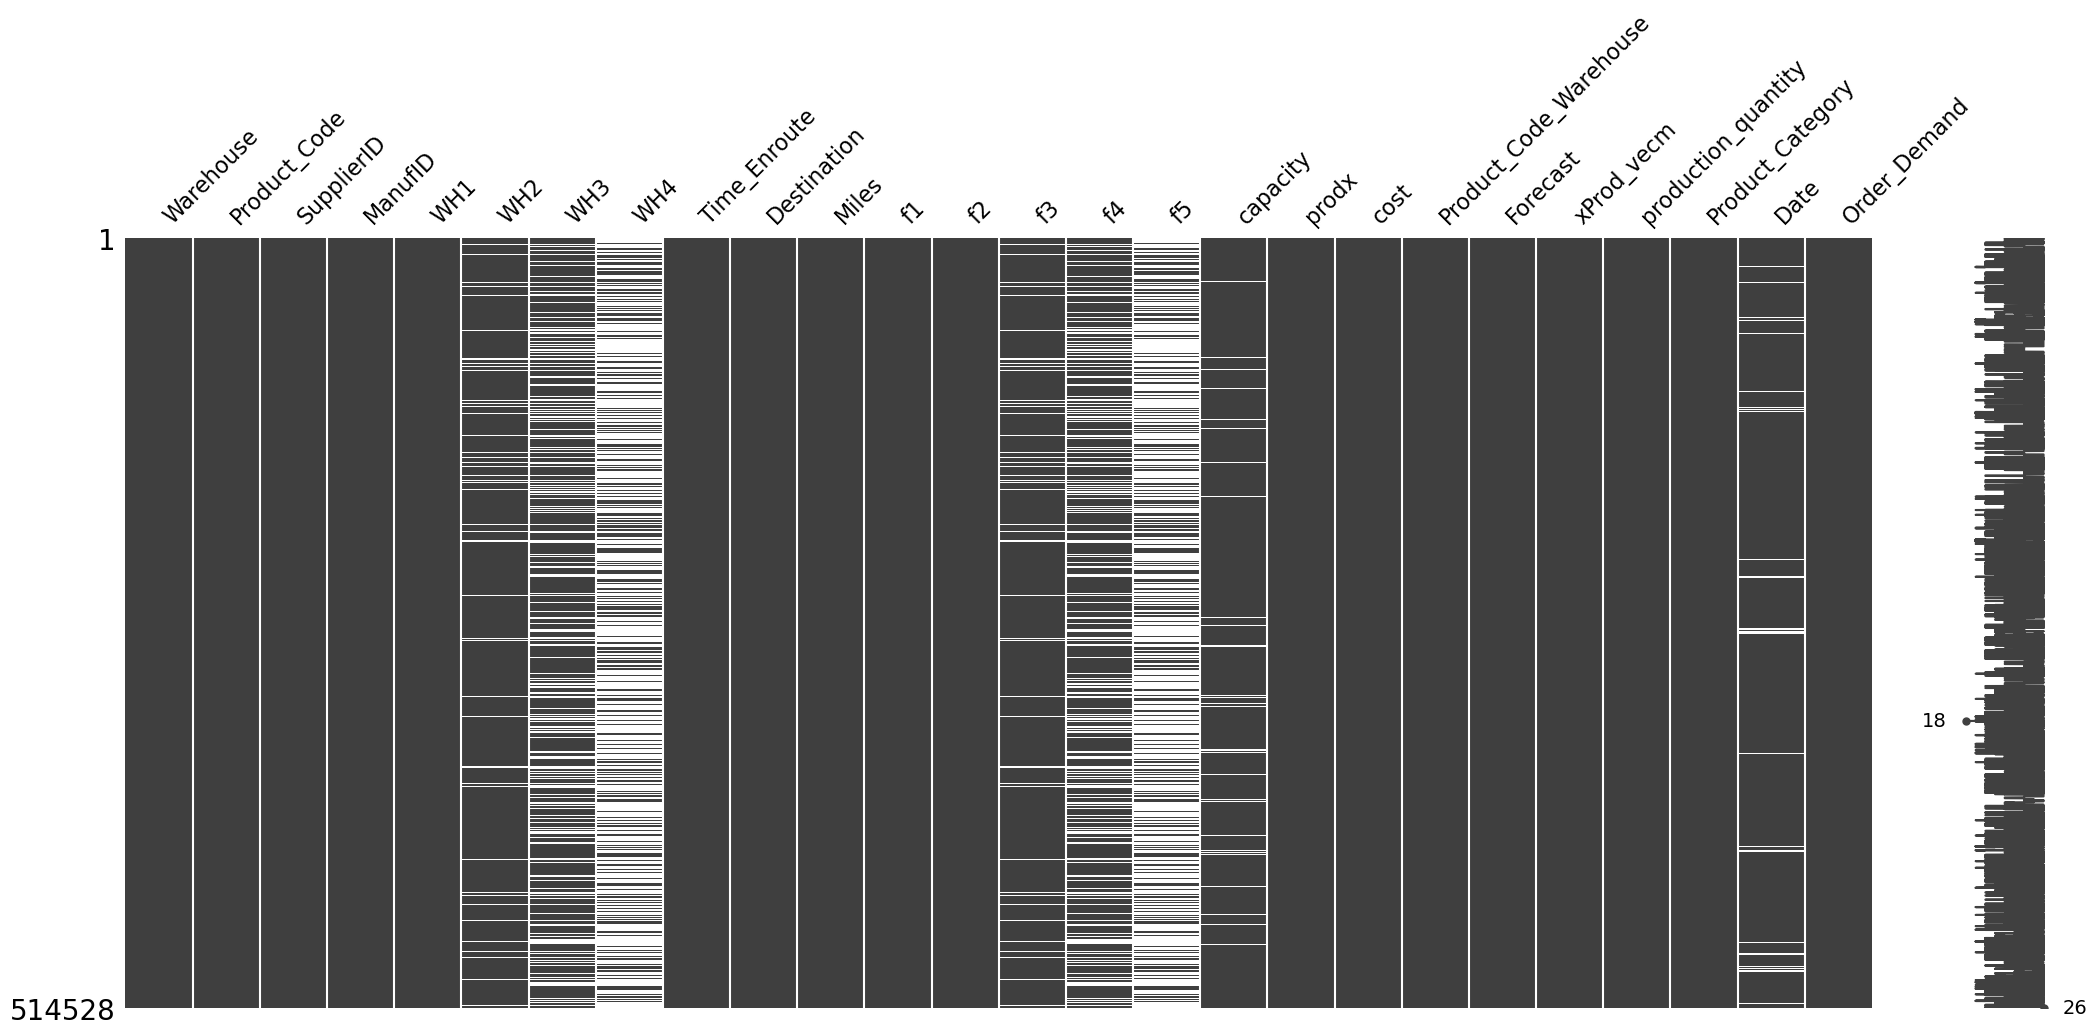

Warehouse                      0
Product_Code                   0
SupplierID                     0
ManufID                        0
WH1                            0
WH2                        31451
WH3                       121751
WH4                       318197
Time_Enroute                   0
Destination                    0
Miles                          0
f1                             0
f2                             0
f3                         31451
f4                        121751
f5                        318197
capacity                   17847
prodx                          0
cost                           0
Product_Code_Warehouse         0
Forecast                       0
xProd_vecm                     0
production_quantity            0
Product_Category               0
Date                       17349
Order_Demand                   0
dtype: int64


In [6]:
# Visualize missing values
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(merged_df)
plt.show()

# Check for missing values
print(merged_df.isnull().sum())

In [7]:
"""Data Cleaning based on EDA"""
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Step 1: Drop irrelevant columns
columns_to_drop = ['prodx', 'Product_Code_Warehouse', 'xProd_vecm']
df = merged_df.drop(columns=columns_to_drop, axis=1)

int_columns = df.select_dtypes(include=['int64', 'UInt32']).columns
df[int_columns] = df[int_columns].astype('float64')
# Verify the changes
print(df.dtypes)

# Step 2: Handle categorical features using label encoding (for XGBoost compatibility)
label_encoder = LabelEncoder()

# Convert categorical columns into numeric
categorical_columns = ['Product_Code', 'SupplierID', 'ManufID', 'Destination', 'Product_Category', 'Warehouse', 'WH1', 'WH2', 'WH3', 'WH4']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Convert 'Date' to datetime and extract useful components
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Step 3: Handle missing values, Fill numeric columns with the mean, int with median
int_columns = df.select_dtypes(include=['UInt32']).columns
df[int_columns] = df[int_columns].fillna(df[int_columns].median())
df['Order_Demand'] = df['Order_Demand'].str.replace(r'[^\d.-]', '', regex=True).astype(float)
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Step 4: Interaction Features (Capture relationships between categorical features)
df['Supplier_Manuf_Interaction'] = df['SupplierID'] * df['ManufID']
df['Warehouse_Product_Interaction'] = df['Warehouse'] * df['Product_Code']

Warehouse                      object
Product_Code                   object
SupplierID                     object
ManufID                        object
WH1                            object
WH2                            object
WH3                            object
WH4                            object
Time_Enroute                  float64
Destination                    object
Miles                         float64
f1                            float64
f2                            float64
f3                            float64
f4                            float64
f5                            float64
capacity                      float64
cost                          float64
Forecast                      float64
production_quantity           float64
Product_Category               object
Date                   datetime64[ns]
Order_Demand                   object
dtype: object


/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


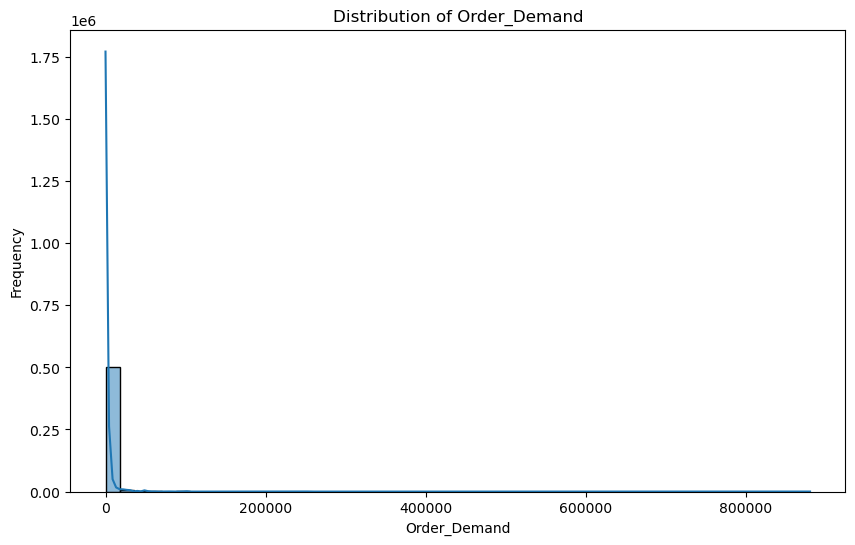

Skewness of Order_Demand: 26.021611022567072


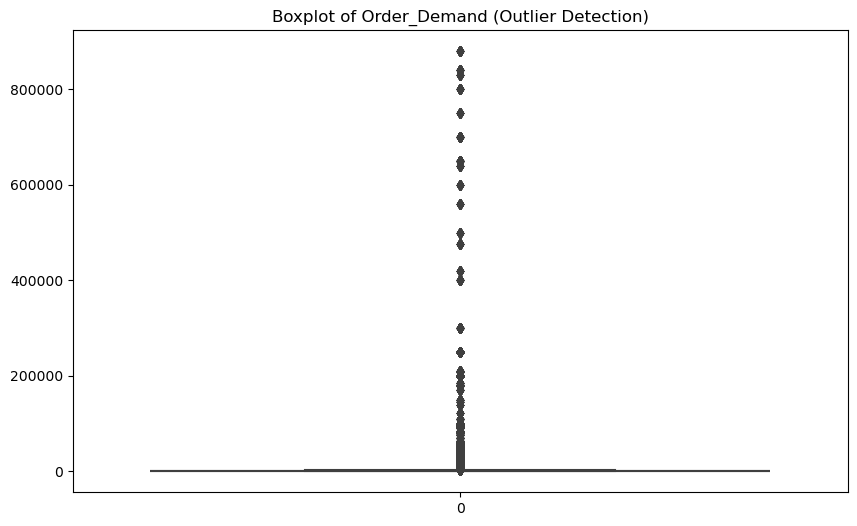

In [8]:
# Plot distribution of Order_Demand
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Order_Demand'], bins=50, kde=True)
plt.title('Distribution of Order_Demand')
plt.xlabel('Order_Demand')
plt.ylabel('Frequency')
plt.show()

# Check for skewness
print(f"Skewness of Order_Demand: {df['Order_Demand'].skew()}")

# Boxplot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(df['Order_Demand'])
plt.title('Boxplot of Order_Demand (Outlier Detection)')
plt.show()

In [ ]:
"""
analysis on these diagrams, 

Histogram with KDE of Order_Demand: 
distribution is extremely right-skewed. Most of the demand values are clustered close to 0, and there is a long tail
spike near 0 indicates that a large portion of the dataset consists of relatively small orders, while the demand for larger orders diminishes significantly but still exists in the dataset

Boxplot for Outlier Detection:
confirms the presence of many outliers in the dataset
Interquartile Range) is small, indicating that most of the data is concentrated in a narrow range of values.
There are a large number of outliers on the upper side (values significantly greater than the rest of the data), with values exceeding 800,000.

skewness and outliers tell us that most of the Order_Demand in the dataset is for small quantities, but a few large orders dominate the upper end of the distribution.
dataset is highly imbalanced in terms of demand, with the majority of data points representing small orders and a minority representing extremely large orders.

imbalance can lead to challenges in predictive modeling:
Models might overfit to the small, frequent orders, underestimating the rare but high-demand orders
Outliers can heavily influence model performance
"""

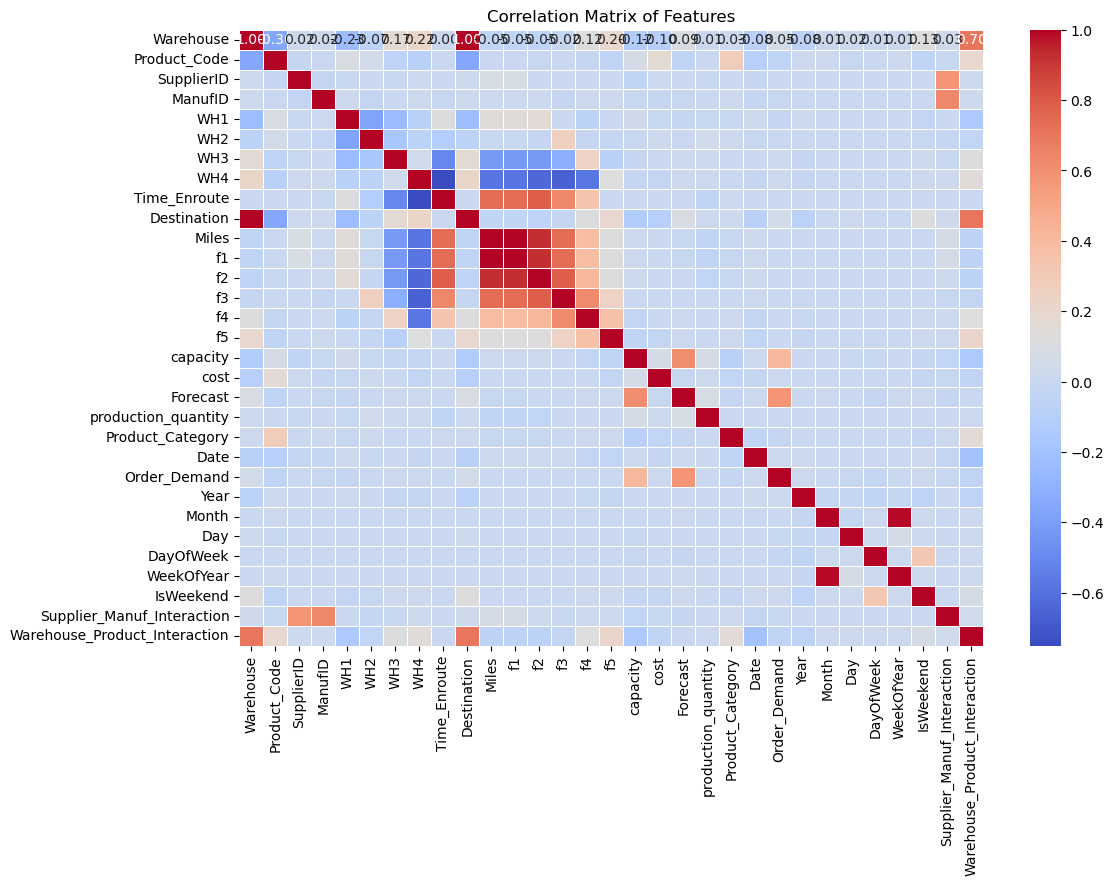

Order_Demand                     1.000000
Forecast                         0.583578
capacity                         0.408750
Warehouse                        0.052763
Destination                      0.052763
IsWeekend                        0.017838
Year                             0.016779
Date                             0.014017
cost                             0.011567
WH3                              0.010210
WH4                              0.008450
f4                               0.005020
SupplierID                       0.004205
f3                               0.004024
f2                               0.003981
Month                            0.002145
Miles                            0.001851
f1                               0.001851
WeekOfYear                       0.001545
production_quantity              0.001522
Time_Enroute                     0.001328
WH2                             -0.002131
f5                              -0.002911
Supplier_Manuf_Interaction      -0

In [9]:
# Feature Correlation Matrix 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
corr_matrix = df.corr()

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Check correlation between individual features and the target
print(corr_matrix['Order_Demand'].sort_values(ascending=False))

In [ ]:
"""
Interpretations from dataset:
can observe clusters of features, eg. f1, f2, f3, f4, and f5
features like Warehouse_Product_Interaction and Supplier_Manuf_Interaction show isolated patches of strong correlation with other features.
Features like Warehouse, SupplierID, and ManufID appear to have low correlations with most other features, indicating they are more independent.
Product_Code, SupplierID, ManufID, and Product_Category show very low or no correlation with other features, suggesting they may be categorical
Forecast, capacity, and cost also show strong correlations with some other features, indicating these could be highly influential variables in predicting Order_Demand.
Order Demand, seems to have moderate correlations with a few features, such as the f-series and interactions 
"""

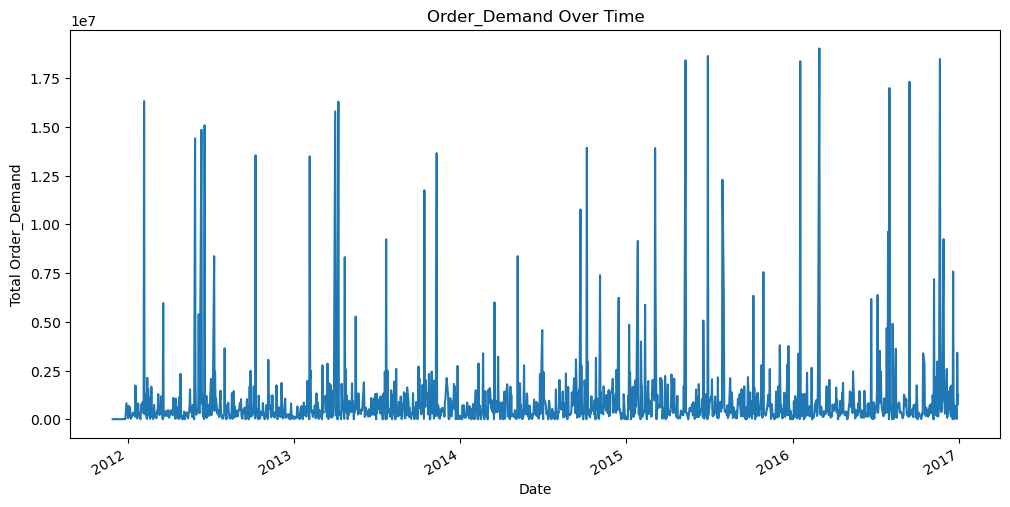

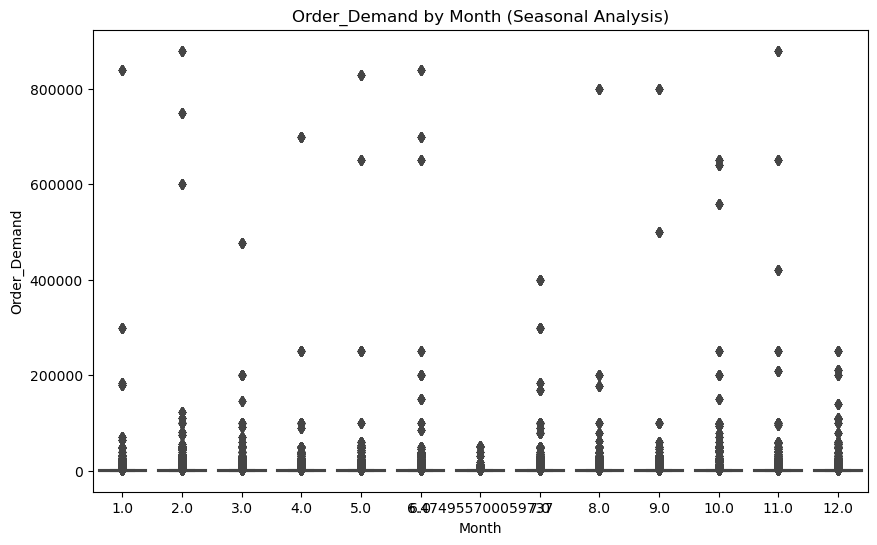

In [10]:
# Plot Order_Demand over time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
df.groupby('Date')['Order_Demand'].sum().plot()
plt.title('Order_Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Total Order_Demand')
plt.show()

# Seasonal plot: Order_Demand by Month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Order_Demand', data=df)
plt.title('Order_Demand by Month (Seasonal Analysis)')
plt.show()

In [ ]:
"""
interpretation:

1st 
spikes might correspond to seasonal trends, special promotions, or other demand-driving events.
spikes appear to occur somewhat irregularly but may follow a yearly or multi-year pattern
demand is sporadic or there is a high level of fluctuation, which could make demand forecasting more challenging
dataset seems highly volatile, as evidenced by the large fluctuations in demand. This volatility could be the result of external factors (e.g., supply chain disruptions, promotions) or internal features (e.g., product-specific demand surges).
there is a surge in 2016-17, demand spikes became more frequent in the 2016-2017 range, showing a potential change in the pattern of order behavior. 
    This might indicate a shift in the business model, new product launches, or market conditions that led to more frequent high demand periods.

2nd:

"""

In [11]:
"""More data preprocessing"""
df = df.drop('Date', axis=1)

# Step 5: Lag Features for Order Demand (if your data has a time series structure)
df['Lag_1'] = df['Order_Demand'].shift(1)  # Demand from the previous entry
df['Lag_7'] = df['Order_Demand'].shift(7)  # Demand from the same day last week

# Fill non-numeric columns (categorical) with the mode (most frequent value)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

df['Rolling_Mean_3'] = df['Order_Demand'].rolling(window=3).mean()
df['Rolling_Mean_7'] = df['Order_Demand'].rolling(window=7).mean()

df.fillna(df.mean(), inplace=True)

# Step 3: Apply log transformation to highly skewed features
df['Order_Demand'] = np.log1p(df['Order_Demand'])
print("Successfully applied log transformation to Order_Demand")

Successfully applied log transformation to Order_Demand


In [12]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
import time

start_time = time.time()

# Step: Split the data into features (X) and target (y)
X = df.drop('Order_Demand', axis=1)
y = df['Order_Demand'].astype(float)

# Step: Assign sample weights based on quantiles of demand
quantiles = np.percentile(y, [25, 50, 75])
weights = np.ones_like(y)
# Assign higher weights to lower and upper quantiles (underrepresented demand levels)
weights[y <= quantiles[0]] = 1.5  # 1st quartile (low demand)
weights[y >= quantiles[2]] = 1.5  # 4th quartile (high demand)

# Step : Split the data into training and test sets
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X, y, weights, test_size=0.2, random_state=42)

# Step: Define hyperparameter space for tuning
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'max_depth': [3, 4, 5],  # Max depth of trees
    'min_child_weight': [1, 2, 3],  # Minimum sum of instance weight needed in a child
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training data
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of features per tree
    'reg_alpha': [0.01, 0.05, 0.1],  # L1 regularization term
    'reg_lambda': [0.5, 1.0, 1.5]    # L2 regularization term
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Step: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model, 
    param_distributions=param_grid, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_squared_error', 
    verbose=1, 
    n_jobs=1
)

# Step: Fit the model with the training data and weights
random_search.fit(X_train, y_train, sample_weight=weights_train)

# Step: Extract the best model
best_model = random_search.best_estimator_

# Step: Evaluate the model
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

# Step: Predict using the best model
y_pred = best_model.predict(X_test)

# Step: Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
relative_rmse = (rmse / y_test.mean()) * 100
mean_demand = y_test.mean()

# Output the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Relative RMSE: {relative_rmse:.2f}%")
print(f"Mean Demand: {mean_demand}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

# Additional evaluation
evaluation_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
evaluation_df.head()

print(f"Execution time: {time.time() - start_time} seconds")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Mean Squared Error (MSE): 1.61672563350148
Root Mean Squared Error (RMSE): 1.2715052628681802
Relative RMSE: 26.68%
Mean Demand: 4.76569143824976
Train Score: 0.7886409367020124
Test Score: 0.78628003140575
Execution time: 260.79549765586853 seconds


In [ ]:
"""combined weight loss with randomsearchCV k fold validation, 0.1:26.68%. best result (was initially 26.5%)"""

In [ ]:
"""
Relative RMSE of 27% is generally considered acceptable, for this specific use case it could require some checks:

Financial Impact Assessment with Cost of Stockouts
Inventory Management KPIs for Service Level and Inventory Turnover
Safety Stock Calculation
Impact on Lead Time
Sensitivity Analysis

In retail, a relative RMSE between 10% and 30% is generally considered acceptable, 
though depends on the complexity of the product mix and seasonality.
For an outdoor equipment shop, where demand can be highly seasonal (e.g., spikes during spring and summer, as well as before holidays), a relative RMSE near 25% is reasonable.

Product Types: Outdoor equipment can range from low-cost, high-volume items (like camping gear) to high-cost, low-volume items (like tents, kayaks, and bikes). Forecasting for high-cost items usually tolerates slightly higher errors due to the lower volume of purchases, while low-cost, high-volume items typically require more precise forecasting.
Seasonality: Because the demand for outdoor equipment is highly seasonal, seasonality adjustments are crucial. If your model captures seasonal trends well, even a relative RMSE of ~26.8% might still be acceptable during off-season times if it's more accurate during peak seasons.

Run Simulations to estimate the financial impact of forecasting errors on your inventory costs and lost sales due to stockouts or overstocking. NOT WITHIN SCOPE OF PROJECT
Benchmark your RMSE against any available industry data or past forecasting methods (moving averages, ARIMA, etc.) to see how much improvement your model brings.
Adjust Safety Stock based on the RMSE to balance procurement efficiency with service level.
"""

In [ ]:
"""
below are some previous versions of simpler XGBoost models, they have marginally worse accuracy but much faster run times. 
It is ucertain how any of these perform on larger datsets, testing of this is not within the scope of this project, so I have left them as part of the notebook. 
"""

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import time

start_time = time.time()

# Step: Split the data into features (X) and target (y)
X = df.drop('Order_Demand', axis=1)
y = df['Order_Demand'].astype(float)

# Step: Assign sample weights based on quantiles of demand
quantiles = np.percentile(y, [25, 50, 75])
weights = np.ones_like(y)
# Assign higher weights to lower and upper quantiles (underrepresented demand levels)
weights[y <= quantiles[0]] = 1.5  # 1st quartile (low demand)
weights[y >= quantiles[2]] = 1.5  # 4th quartile (high demand)

# Step : Split the data into training and test sets
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X, y, weights, test_size=0.2, random_state=42)

# Step : Train an XGBoost model with sample weights
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train, sample_weight=weights_train)

# Step : Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

y_pred = model.predict(X_test)

# Step : Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
relative_rmse = (rmse / y_test.mean()) * 100
mean_demand = y_test.mean()

# Output the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Relative RMSE: {relative_rmse:.2f}%")
print(f"Mean Demand: {mean_demand}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

# Additional evaluation
evaluation_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
evaluation_df.head()
print(f"Execution time: {time.time() - start_time} seconds")

Mean Squared Error (MSE): 1.632817576975212
Root Mean Squared Error (RMSE): 1.277817505348558
Relative RMSE: 26.81%
Mean Demand: 4.76569143824976
Train Score: 0.7864026698230477
Test Score: 0.7841527875601891
Execution time: 2.983020544052124 seconds


In [ ]:
"""
weight loss function, 
Apply log transformation to highly skewed order demand
took relative RMSE down to 0.1: 26% SUCCESS
"""

In [11]:
"""DONT NEED TO RUN ANYMORE, BUT KEEP RESULTS AND CODE"""

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import time

start_time = time.time()

# Step: Split the data into features (X) and target (y)
X = df.drop('Order_Demand', axis=1)
y = df['Order_Demand'].astype(float)

# Step : Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step: Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],  # Narrower range
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],  # Fine-tuning smaller ranges
    'min_child_weight': [1, 2, 3],  # Narrower range
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0.01, 0.05, 0.1],  # More regularization
    'reg_lambda': [0.5, 1.0, 1.5]    # More regularization
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

random_search = RandomizedSearchCV(
    estimator=xgb_model, 
    param_distributions=param_grid, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_squared_error', 
    verbose=1, 
    n_jobs=1
)
random_search.fit(X_train, y_train)

# Step : Train the best model from GridSearchCV with early stopping
best_model = random_search.best_estimator_

# Now, fit with early stopping using the validation set
best_model.fit(X_train, y_train)

# Step : Evaluate the model
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

y_pred = best_model.predict(X_test)

# Step : Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
relative_rmse = (rmse / y_test.mean()) * 100
mean_demand = y_test.mean()

# Output the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Relative RMSE: {relative_rmse:.2f}%")
print(f"Mean Demand: {mean_demand}")

# Additional evaluation
evaluation_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
evaluation_df.head()
print(f"Execution time: {time.time() - start_time} seconds")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Mean Squared Error (MSE): 1.6121421196100456
Root Mean Squared Error (RMSE): 1.2697015868344994
Relative RMSE: 26.64%
Mean Demand: 4.76569143824976
Execution time: 257.434823513031 seconds


In [ ]:
"""
just randomsearchCV, 0.1:26.6%
"""

In [ ]:
"""
this is the baseline model I have 
(goes to 0.05:71% relative RMSE, which is quite bad, but the best so far lol)
will increase sample size, see if it improves accuracy
"""

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import time

start_time = time.time()

# Step: Split the data into features (X) and target (y)
X = df.drop('Order_Demand', axis=1)
y = df['Order_Demand'].astype(float)

# Step : Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step : Train an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Step : Evaluate the model (you can further evaluate on test set as needed)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

train_score, test_score

y_pred = model.predict(X_test)

# Step : Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
relative_rmse = (rmse / y_test.mean()) * 100
mean_demand = y_test.mean()

# Output the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Relative RMSE: {relative_rmse:.2f}%")
print(f"Mean Demand: {mean_demand}")

# Additional evaluation
evaluation_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
evaluation_df.head()
print(f"Execution time: {time.time() - start_time} seconds")

Mean Squared Error (MSE): 8485033.388997389
Root Mean Squared Error (RMSE): 2912.9080639452714
Relative RMSE: 108.31%
Mean Demand: 2689.5390842127767
Execution time: 3.1964919567108154 seconds


In [ ]:
"""FINAL STEPS, 
Clean up comments, 
add visualisation for XGBoost model accuracy, 
choose weigh loss/k fold/both (prob both)
leverage generative AI to provide reasoning, recommendations 
"""

In [ ]:
"""Visualisation of results"""

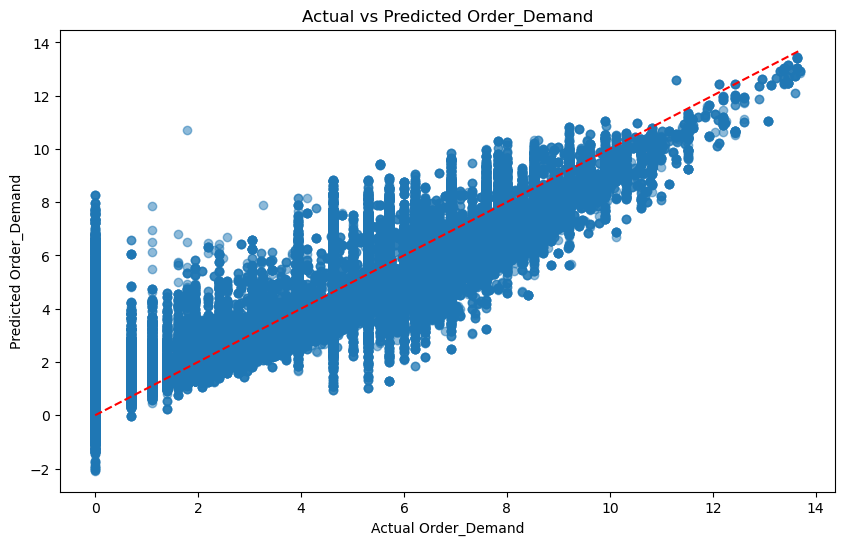

In [13]:
"""Plot Actual vs. Predicted Values"""
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Order_Demand')
plt.ylabel('Predicted Order_Demand')
plt.title('Actual vs Predicted Order_Demand')
plt.show()



In [ ]:
"""
There is a clear positive correlation between actual and predicted values. 

However: 
There is significant scattering at the lower-demand values, with many points showing overestimation. The model struggles to predict very low-demand cases accurately.
there is notable underprediction in the high-demand values, the model might not be fully capturing the dynamics of higher demand scenarios.

logarithmic scaling has already been applied to scale more extreme demand values. 
extreme values could be capped, but for now 26% is an acceptable accuracy.
"""

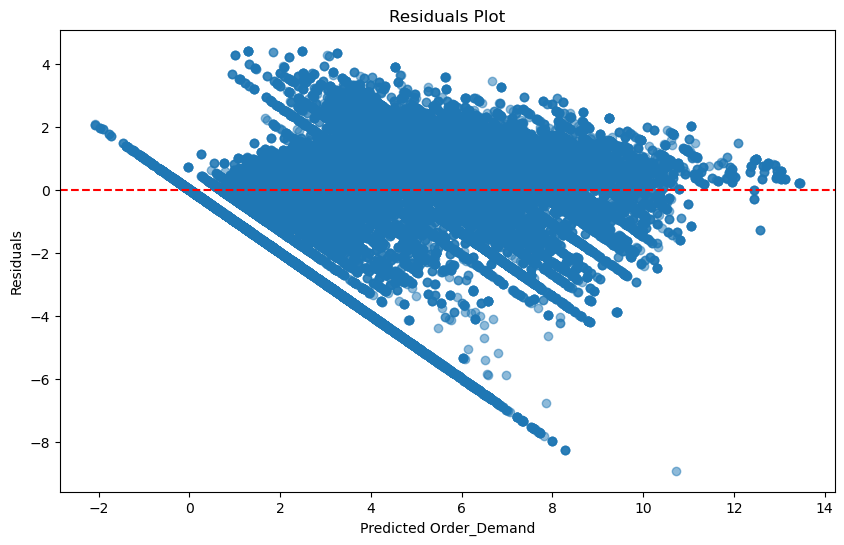

In [14]:
"""Residuals Plot"""
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Order_Demand')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [ ]:
"""
Results: model is shown to have a bias in predictions.

Pattern:
The residuals show a distinct pattern (not random scatter), indicating a problem with the model's assumptions or the underlying data.
The funnel shape (narrower at low predictions, widening with higher predicted values) suggests that the model does not handle variance in the data well, particularly for higher demand values.

Systematic underprediction:
The lower left portion of the graph shows a consistent negative bias, especially for higher predicted demand values.
Model is underestimating actual demand.
residuals tend to move downward as the predicted Order_Demand increases, indicating that the model may be systematically underpredicting for larger values.

overprediction for lower demand.

Homoskedasticity Issue:
The spread of residuals increases as the predicted Order_Demand increases, indicating a heteroskedasticity issue,
meaning the variance of the residuals is not constant. 
This can affect the model's performance, especially for high-demand predictions.

"""

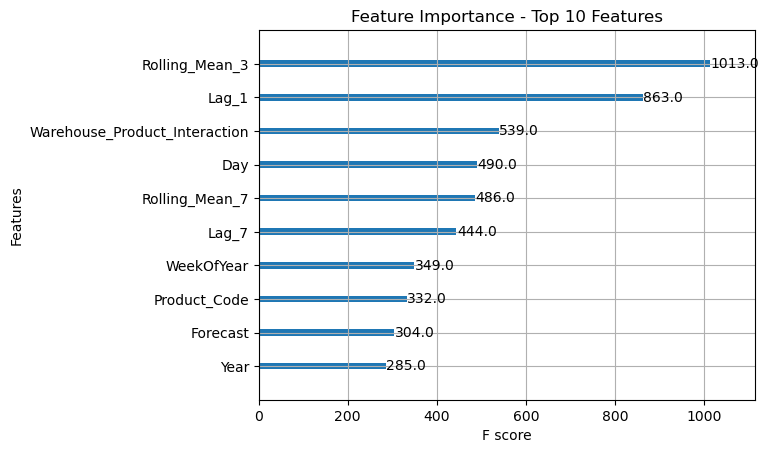

In [15]:
"""Feature Importance Plot"""
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance - Top 10 Features')
plt.show()

In [ ]:
"""
Interpretations:

F score - how often a feature is used in tree splits. 
Rolling mean features are clearly the most important, implying that recent demand trends (rolling means and lags) are critical for the model to predict future demand.
this aligns with earlier hypotheses about non-linear relationships dominating, such as recent demand trends. 

historical demand patterns are the primary drivers of the model's predictions. This is appropriate for a time-series demand forecasting model but might also indicate some areas for improvement.
The interaction between warehouse and product is also essential, indicating that geographic and product-specific factors have a strong influence on demand.
There are several seasonal indicators in the top features, such as Day and WeekOfYear, suggesting that the model considers cyclical demand fluctuations.

for further improvement:
more interaction features could be added, such as Supplier_Product_Interaction or Warehouse_Seasonality. 

there is high reliance on the Rolling_Mean_3 and Lag_1 suggests that the model might be somewhat overfitting to short-term fluctuations in the data. 
the model could be regularised further
"""

In [20]:
"""Learning Curves
import matplotlib.pyplot as plt

results = best_model.evals_result()

# Assuming you are tracking 'rmse' during training
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results['validation_1']['rmse'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('XGBoost Learning Curves (RMSE)')
plt.legend()
plt.show()"""

XGBoostError: No evaluation result, `eval_set` is not used during training.

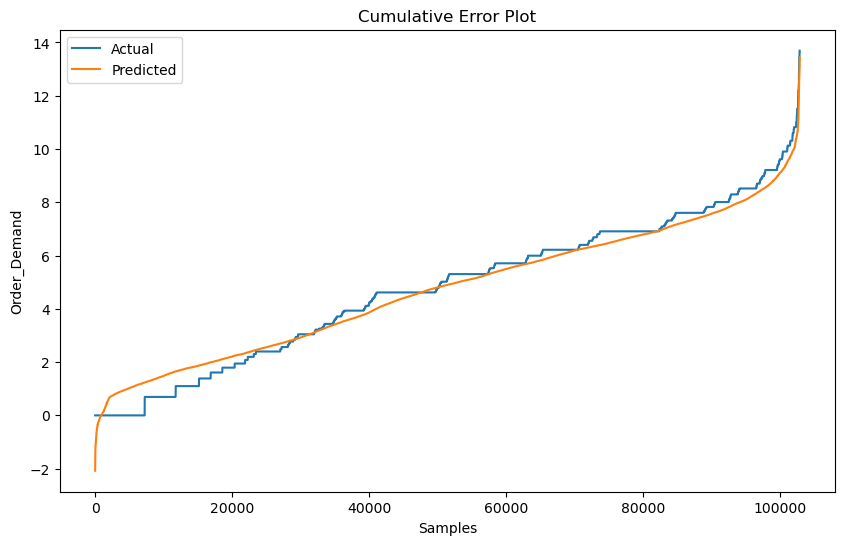

In [16]:
"""Cumulative Error Plot"""
import numpy as np
import matplotlib.pyplot as plt

sorted_y_test = np.sort(y_test)
sorted_y_pred = np.sort(y_pred)

plt.figure(figsize=(10, 6))
plt.plot(sorted_y_test, label='Actual')
plt.plot(sorted_y_pred, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Order_Demand')
plt.title('Cumulative Error Plot')
plt.legend()
plt.show()

In [ ]:
"""
Interpretations:

Overall fit closely follows the actual demand curve, indicating the model generally performs well.
The predicted line deviates more noticeably from the actual line in the tail, showing underprediction of demand in lower values.

Actual demand is step-like, while predicted curve is smoother. 
The model is averaging out those jumps, leading to slightly less precision in predicting exact values of demand, particularly at the extremes.

"""

In [ ]:
"""Leveraging watsonx generative AI"""
import requests

url = "https://us-south.ml.cloud.ibm.com/ml/v1/text/generation?version=2023-05-29"

body = {
	"input": """<|system|>
You are Granite Chat, an AI language model developed by IBM. You are a cautious assistant. You carefully follow instructions. You are helpful and harmless and you follow ethical guidelines and promote positive behavior. You always respond to greetings (for example, hi, hello, g'\''day, morning, afternoon, evening, night, what'\''s up, nice to meet you, sup, etc) with \"Hello! I am Granite Chat, created by IBM. How can I help you today?\". Please do not say anything else and do not start a conversation.
<|assistant|>
""",
	"parameters": {
		"decoding_method": "greedy",
		"max_new_tokens": 900,
		"repetition_penalty": 1.05
	},
	"model_id": "ibm/granite-13b-chat-v2",
	"project_id": "71751f6a-29aa-40e5-9bf5-b3e48098b5cc"
}

headers = {
	"Accept": "application/json",
	"Content-Type": "application/json",
	"Authorization": "Bearer YOUR_ACCESS_TOKEN"
}

response = requests.post(
	url,
	headers=headers,
	json=body
)

if response.status_code != 200:
	raise Exception("Non-200 response: " + str(response.text))

data = response.json()



In [ ]:
"""
USE OF WATSONX GENERATIVE AI. 

Prompted the ai to produce tuning recommendations for the XGBoost model to improve accuracy.

Once model predicts results, the LLM can generate recommendations, reasoning behind the forecasted demand and further personalised advice. 

"""

